# скрипт #03a v2
<hr>

# страндарные библиотеки для работы

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.collections import LineCollection

from IPython.core.display import HTML

In [2]:
# sklearn packages
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [3]:
fileNames=['rawDataFull1001.csv', 'rawDataFull1003.csv', 
            'rawDataFull1004.csv', 'rawDataFull1005.csv',
            'rawDataFull1006.csv']
path='../ITC RUSAL/baths_v2/'
bathNumber=['1001','1003','1004','1005','1006']

In [4]:
# data[0] - 1001, 1 - 1003, 2 - 1004, 3 - 1005, 4 - 1006
data=[]
for dataset in fileNames:
    data.append(pd.read_csv(path+dataset))

In [5]:
# удалить столбец "KOL4", т.к. он пустой по всех 5ти наборах
# удалить столбец "TIME4", т.к. он равен 0 по всех 5ти наборах
for i in range(5):
    data[i]=data[i].drop(columns=['KOL4'])
    data[i]=data[i].drop(columns=['TIME4'])
    

In [6]:
fullNames=['АЭ: длит. <Сред.>', 'АЭ: кол-во <Сред.>', 'АЭ: напр. ср.м. <Сред.>(В)',
            'Время в недопитке <Сред.> (час)', 'Время в номинале <Сред.> (час)',
            'Время  в перепитке <Сред.> (час)', 'Время в тесте <Сред.> (час)', 
            'Время на голод. <Сред.> (час)', 'Кол-во доз АПГ в недопитке <Сумма> (шт.)',
            'Кол-во доз АПГ в номинале <Сумма> (шт.)', 'Кол-во доз АПГ в перепитке <Сумма> (шт.)',
            'Кол-во доз АПГ в тесте <Сумма> (шт.)', 'Напр. зад. <Сред.> (В)', 'Напр. эл-ра <Сред.> (В)',
            'Настыль: длина <Сред.> (см)', 'Подина: состояние <Сред.> (оц.)', 
            'РМПР: длит. ВИРА <Сред.> (сек)', 'РМПР: длит. МАЙНА <Сред.> (сек)', 
            'РМПР: коэфф. <Сред.>', 'РМПР: кол-во ВИРА <Сред.> (шт)', 'РМПР: кол-во МАЙНА <Сред.> (шт)',
            'Эл-лит: темп-ра <Сред.> (°C)', 'Металл: уровень <Сред.> (см)', 'Эл-лит: уровень <Сред.> (см)', 
            'Шум <Сред.> (В)', 'Эл-лит: CaF2 <Сред.> (%)', 'Эл-лит: КО <Сред.>', 'AlF3: добавка <Сред.> (кг)',
            'Напр. анода <Сред.> (В)' ]
fullNames_2=['Выход на в.сутки: Кр/весы <Сред.> (кг)', 'Выход на в.сутки: Л/О <Сред.> (кг)',
            'Выход на в.сутки: по заданию <Сред.> (кг)', 'Выход по току: Л/О <Сред.> (%)',
            'Ток серии (АСУТП) <Сред.> (кА)']

In [7]:
fullNames.remove('Кол-во доз АПГ в тесте <Сумма> (шт.)')
fullNames.remove('Время в тесте <Сред.> (час)')
fullNamesInRussian=fullNames+fullNames_2

In [8]:
paramNames=data[0].columns.to_list()

##  нормализуем в $[0,1]$

In [9]:
dataScaled=[]
for i in range(5):
    x=data[i].values
    scaler = preprocessing.MinMaxScaler()
    x_scaled = scaler.fit_transform(x)
    dataScaled.append( pd.DataFrame(x_scaled, columns=data[i].columns.values) )

## детальный анализа на примере ванны 1001

In [10]:
dataScaled[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 32 columns):
AE1         120 non-null float64
AE2         365 non-null float64
AE3         120 non-null float64
TIME1       365 non-null float64
TIME2       365 non-null float64
TIME3       365 non-null float64
TIME5       111 non-null float64
KOL1        365 non-null float64
KOL2        365 non-null float64
KOL3        365 non-null float64
U1          365 non-null float64
U2          365 non-null float64
NAST        55 non-null float64
POD         50 non-null float64
RMPR1       347 non-null float64
RMPR2       364 non-null float64
RMPR3       365 non-null float64
RMPR4       365 non-null float64
RMPR5       365 non-null float64
ETEMP       364 non-null float64
METAL       364 non-null float64
ELEVEL      364 non-null float64
NOISE       365 non-null float64
ERATE       152 non-null float64
EKO         152 non-null float64
AIF3        356 non-null float64
UANOD       365 non-null float64
NETOUT

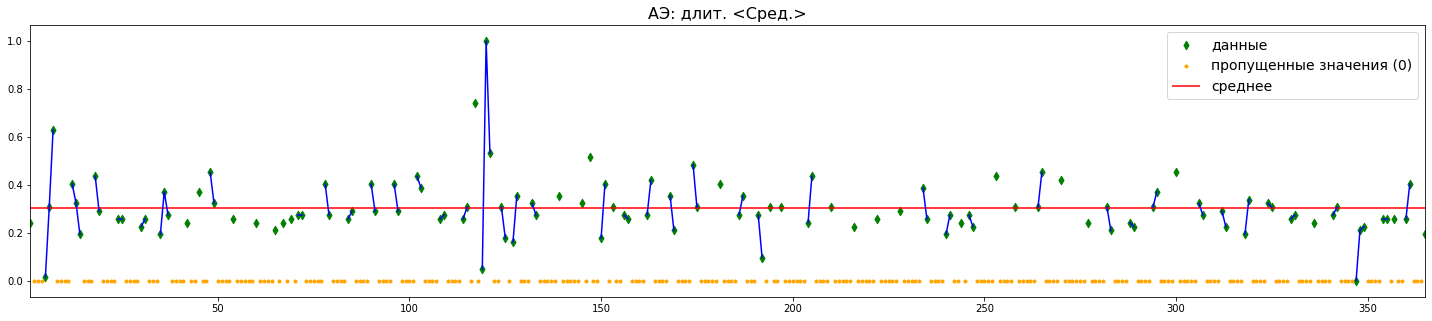

In [32]:
# значения заполненных данных
y1=dataScaled[0]['AE1'][dataScaled[0]['AE1'].notna()].values
# индексы заполненных данных (от 1 до ...) для графиков
x1=dataScaled[0]['AE1'][dataScaled[0]['AE1'].notna()].index+1
# индексы пропущенных данных (от 1 до ...) для графиков
x2=dataScaled[0]['AE1'][dataScaled[0]['AE1'].isnull()].index+1
# массив для значений интерполированных данных
y2=np.zeros(len(x2))

fig, ax = plt.subplots(figsize=(25,5))
ax.scatter(x1,y1, color='green', marker='d', label='данные')

a=x1[0]
xx1=[]
xx1.append(x1[0])
yy1=[]
yy1.append(y1[0])
collect=[]
for i in range(len(x1)-1):
    if (x1[i+1]-a)==1:
        xx1.append(x1[i+1])
        yy1.append(y1[i+1])
        a=x1[i+1]
    else:
        if len(xx1)>1:
            ax.plot(xx1,yy1, color='blue')
        a=x1[i+1]
        xx1=[]
        xx1.append(x1[i+1])
        yy1=[]
        yy1.append(y1[i+1])        

ax.scatter(x2,y2, color='orange', marker='.', label='пропущенные значения (0)')
ax.hlines(np.mean(y1),1,365, color='red', label='среднее')
ax.set_xlim(1,365)
ax.legend(fontsize=14)
ax.set_title(fullNamesInRussian[paramNames.index('AE1')], fontsize=16)
plt.savefig('report_v2/missingValuesRaw_AE1.png', dpi=300, bbox_inches='tight')
plt.show()

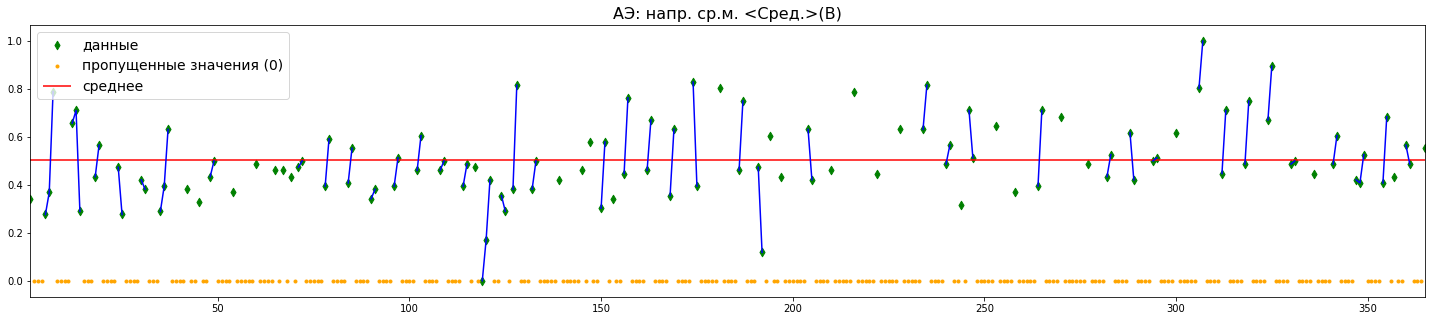

In [33]:
y1=dataScaled[0]['AE3'][dataScaled[0]['AE3'].notna()].values
x1=dataScaled[0]['AE3'][dataScaled[0]['AE3'].notna()].index+1
x2=dataScaled[0]['AE3'][dataScaled[0]['AE3'].isnull()].index+1
y2=np.zeros(len(x2))

fig, ax = plt.subplots(figsize=(25,5))
ax.scatter(x1,y1, color='green', marker='d', label='данные')

a=x1[0]
xx1=[]
xx1.append(x1[0])
yy1=[]
yy1.append(y1[0])
for i in range(len(x1)-1):
    if (x1[i+1]-a)==1:
        xx1.append(x1[i+1])
        yy1.append(y1[i+1])
        a=x1[i+1]
    else:
        if len(xx1)>1:
            ax.plot(xx1,yy1, color='blue')
        a=x1[i+1]
        xx1=[]
        xx1.append(x1[i+1])
        yy1=[]
        yy1.append(y1[i+1])        

ax.scatter(x2,y2, color='orange', marker='.', label='пропущенные значения (0)')
ax.hlines(np.mean(y1),1,365, color='red', label='среднее')
ax.set_xlim(1,365)
ax.legend(fontsize=14)
ax.set_title(fullNamesInRussian[paramNames.index('AE3')], fontsize=16)
plt.savefig('report_v2/missingValuesRaw_AE3.png', dpi=300, bbox_inches='tight')
plt.show()

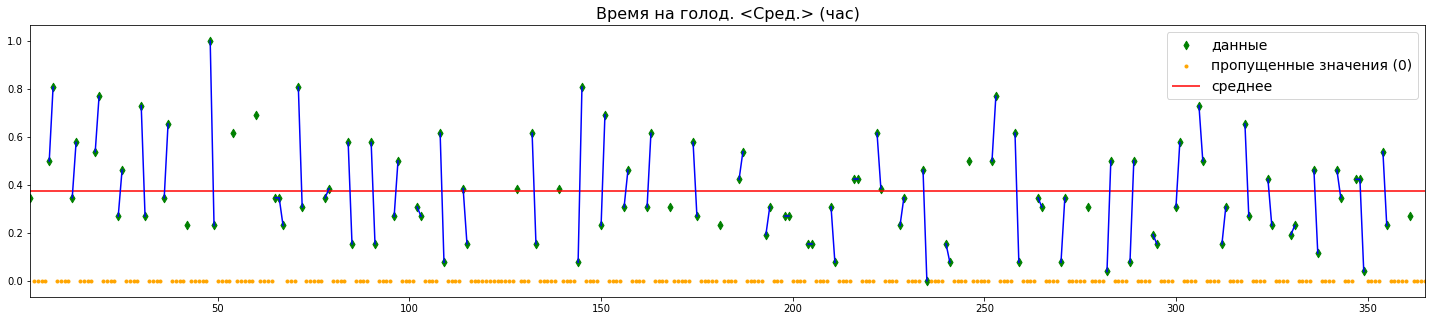

In [34]:
y1=dataScaled[0]['TIME5'][dataScaled[0]['TIME5'].notna()].values
x1=dataScaled[0]['TIME5'][dataScaled[0]['TIME5'].notna()].index+1
x2=dataScaled[0]['TIME5'][dataScaled[0]['TIME5'].isnull()].index+1
y2=np.zeros(len(x2))

fig, ax = plt.subplots(figsize=(25,5))
ax.scatter(x1,y1, color='green', marker='d', label='данные')

a=x1[0]
xx1=[]
xx1.append(x1[0])
yy1=[]
yy1.append(y1[0])
for i in range(len(x1)-1):
    if (x1[i+1]-a)==1:
        xx1.append(x1[i+1])
        yy1.append(y1[i+1])
        a=x1[i+1]
    else:
        if len(xx1)>1:
            ax.plot(xx1,yy1, color='blue')
        a=x1[i+1]
        xx1=[]
        xx1.append(x1[i+1])
        yy1=[]
        yy1.append(y1[i+1])        

ax.scatter(x2,y2, color='orange', marker='.', label='пропущенные значения (0)')
ax.hlines(np.mean(y1),1,365, color='red', label='среднее')
ax.set_xlim(1,365)
ax.legend(fontsize=14)
ax.set_title(fullNamesInRussian[paramNames.index('TIME5')], fontsize=16)
plt.savefig('report_v2/missingValuesRaw_TIME5.png', dpi=300, bbox_inches='tight')
plt.show()

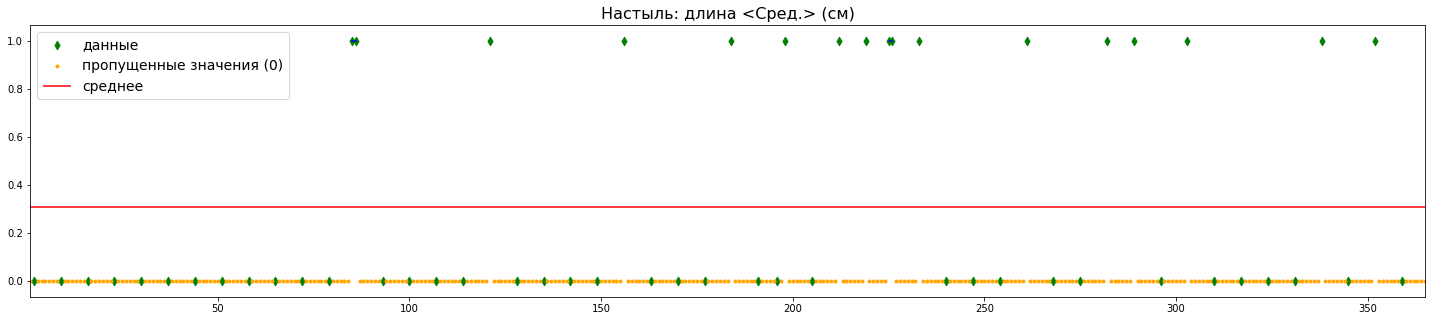

In [35]:
y1=dataScaled[0]['NAST'][dataScaled[0]['NAST'].notna()].values
x1=dataScaled[0]['NAST'][dataScaled[0]['NAST'].notna()].index+1
x2=dataScaled[0]['NAST'][dataScaled[0]['NAST'].isnull()].index+1
y2=np.zeros(len(x2))

fig, ax = plt.subplots(figsize=(25,5))
ax.scatter(x1,y1, color='green', marker='d', label='данные')

a=x1[0]
xx1=[]
xx1.append(x1[0])
yy1=[]
yy1.append(y1[0])
for i in range(len(x1)-1):
    if (x1[i+1]-a)==1:
        xx1.append(x1[i+1])
        yy1.append(y1[i+1])
        a=x1[i+1]
    else:
        if len(xx1)>1:
            ax.plot(xx1,yy1, color='blue')
        a=x1[i+1]
        xx1=[]
        xx1.append(x1[i+1])
        yy1=[]
        yy1.append(y1[i+1])        

ax.scatter(x2,y2, color='orange', marker='.', label='пропущенные значения (0)')
ax.hlines(np.mean(y1),1,365, color='red', label='среднее')
ax.set_xlim(1,365)
ax.legend(fontsize=14)
ax.set_title(fullNamesInRussian[paramNames.index('NAST')], fontsize=16)
plt.savefig('report_v2/missingValuesRaw_NAST.png', dpi=300, bbox_inches='tight')
plt.show()

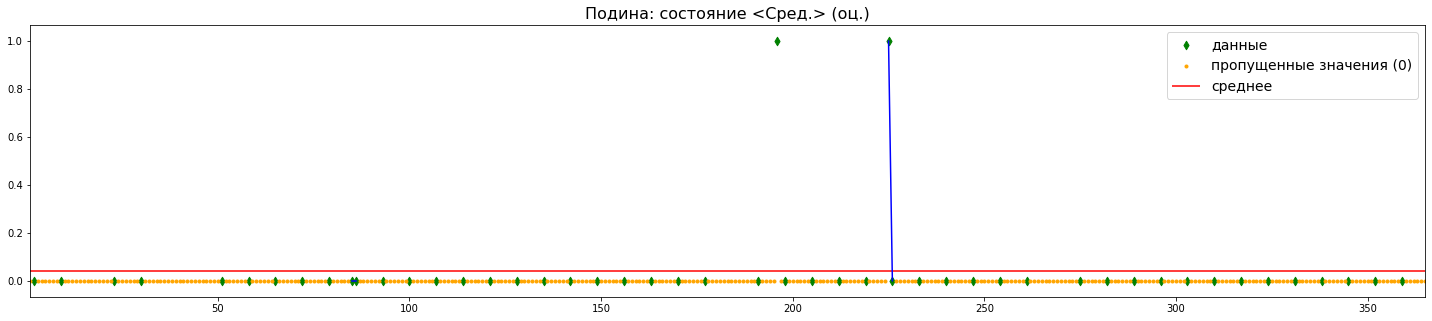

In [36]:
y1=dataScaled[0]['POD'][dataScaled[0]['POD'].notna()].values
x1=dataScaled[0]['POD'][dataScaled[0]['POD'].notna()].index+1
x2=dataScaled[0]['POD'][dataScaled[0]['POD'].isnull()].index+1
y2=np.zeros(len(x2))

fig, ax = plt.subplots(figsize=(25,5))
ax.scatter(x1,y1, color='green', marker='d', label='данные')

a=x1[0]
xx1=[]
xx1.append(x1[0])
yy1=[]
yy1.append(y1[0])
for i in range(len(x1)-1):
    if (x1[i+1]-a)==1:
        xx1.append(x1[i+1])
        yy1.append(y1[i+1])
        a=x1[i+1]
    else:
        if len(xx1)>1:
            ax.plot(xx1,yy1, color='blue')
        a=x1[i+1]
        xx1=[]
        xx1.append(x1[i+1])
        yy1=[]
        yy1.append(y1[i+1])        

ax.scatter(x2,y2, color='orange', marker='.', label='пропущенные значения (0)')
ax.hlines(np.mean(y1),1,365, color='red', label='среднее')
ax.set_xlim(1,365)
ax.legend(fontsize=14)
ax.set_title(fullNamesInRussian[paramNames.index('POD')], fontsize=16)
plt.savefig('report_v2/missingValuesRaw_POD.png', dpi=300, bbox_inches='tight')
plt.show()

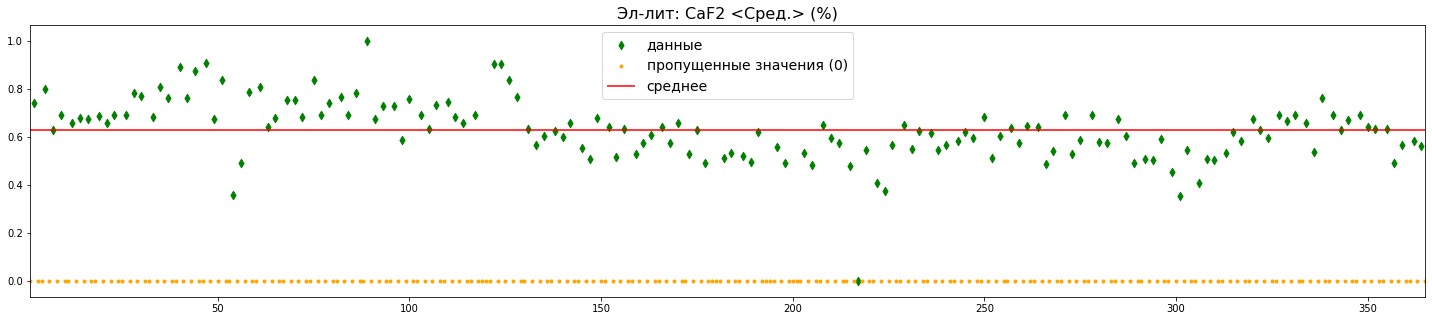

In [37]:
y1=dataScaled[0]['ERATE'][dataScaled[0]['ERATE'].notna()].values
x1=dataScaled[0]['ERATE'][dataScaled[0]['ERATE'].notna()].index+1
x2=dataScaled[0]['ERATE'][dataScaled[0]['ERATE'].isnull()].index+1
y2=np.zeros(len(x2))

fig, ax = plt.subplots(figsize=(25,5))
ax.scatter(x1,y1, color='green', marker='d', label='данные')

a=x1[0]
xx1=[]
xx1.append(x1[0])
yy1=[]
yy1.append(y1[0])
for i in range(len(x1)-1):
    if (x1[i+1]-a)==1:
        xx1.append(x1[i+1])
        yy1.append(y1[i+1])
        a=x1[i+1]
    else:
        if len(xx1)>1:
            ax.plot(xx1,yy1, color='blue')
        a=x1[i+1]
        xx1=[]
        xx1.append(x1[i+1])
        yy1=[]
        yy1.append(y1[i+1])        

ax.scatter(x2,y2, color='orange', marker='.', label='пропущенные значения (0)')
ax.hlines(np.mean(y1),1,365, color='red', label='среднее')
ax.set_xlim(1,365)
ax.legend(fontsize=14)
ax.set_title(fullNamesInRussian[paramNames.index('ERATE')], fontsize=16)
plt.savefig('report_v2/missingValuesRaw_ERATE.png', dpi=300, bbox_inches='tight')
plt.show()

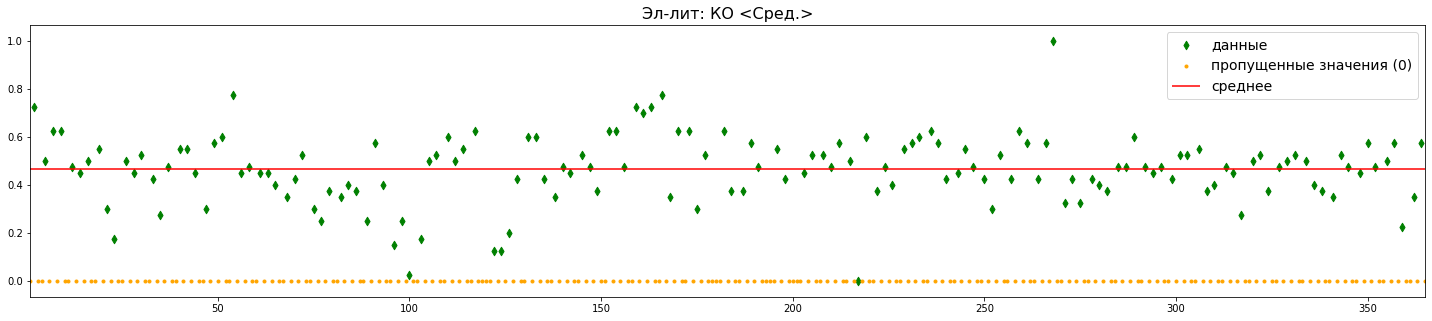

In [38]:
y1=dataScaled[0]['EKO'][dataScaled[0]['EKO'].notna()].values
x1=dataScaled[0]['EKO'][dataScaled[0]['EKO'].notna()].index+1
x2=dataScaled[0]['EKO'][dataScaled[0]['EKO'].isnull()].index+1
y2=np.zeros(len(x2))

fig, ax = plt.subplots(figsize=(25,5))
ax.scatter(x1,y1, color='green', marker='d', label='данные')

a=x1[0]
xx1=[]
xx1.append(x1[0])
yy1=[]
yy1.append(y1[0])
for i in range(len(x1)-1):
    if (x1[i+1]-a)==1:
        xx1.append(x1[i+1])
        yy1.append(y1[i+1])
        a=x1[i+1]
    else:
        if len(xx1)>1:
            ax.plot(xx1,yy1, color='blue')
        a=x1[i+1]
        xx1=[]
        xx1.append(x1[i+1])
        yy1=[]
        yy1.append(y1[i+1])        

ax.scatter(x2,y2, color='orange', marker='.', label='пропущенные значения (0)')
ax.hlines(np.mean(y1),1,365, color='red', label='среднее')
ax.set_xlim(1,365)
ax.legend(fontsize=14)
ax.set_title(fullNamesInRussian[paramNames.index('EKO')], fontsize=16)
plt.savefig('report_v2/missingValuesRaw_EKO.png', dpi=300, bbox_inches='tight')
plt.show()

## варианты заполнения AE1

In [39]:
y1=dataScaled[0]['AE1'][dataScaled[0]['AE1'].notna()].values
x1=dataScaled[0]['AE1'][dataScaled[0]['AE1'].notna()].index+1

xEmpty=dataScaled[0]['AE1'][dataScaled[0]['AE1'].isnull()].index+1
yMean=np.array(len(xEmpty)*[np.mean(y1)])
yMedian=np.array(len(xEmpty)*[np.median(y1)])

xWhole=np.concatenate((x1,xEmpty), axis=None)
yWholeMean=np.concatenate((y1,yMean), axis=None)[xWhole.argsort()]
yWholeMedian=np.concatenate((y1,yMedian), axis=None)[xWhole.argsort()]
xWhole=xWhole[xWhole.argsort()]

dataAE1=dataScaled[0]['AE1'].copy()
yPad=dataAE1.fillna(method='pad').copy()
yIntLin=dataAE1.interpolate(method='linear').copy()
yIntCubic=dataAE1.interpolate(method='cubic').copy()
yIntQuadr=dataAE1.interpolate(method='quadratic').copy()
yIntSpline=dataAE1.interpolate(method='spline', order=2).copy()

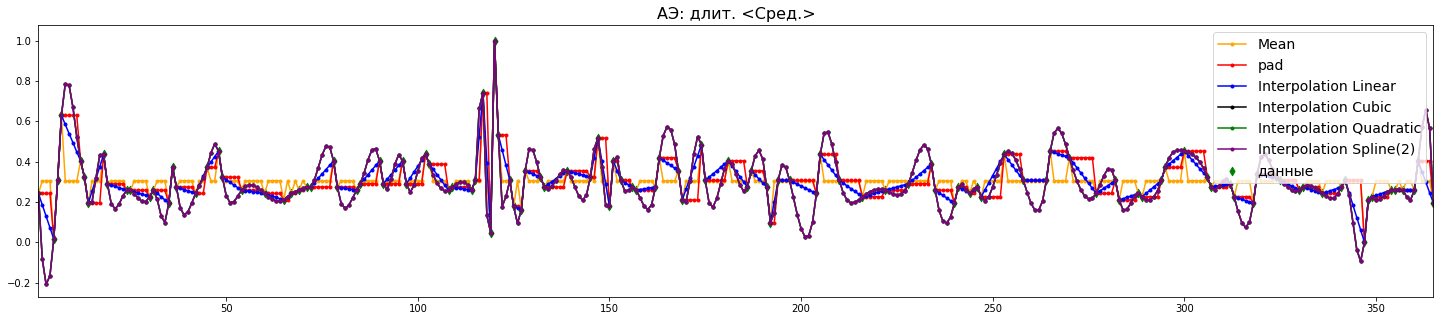

In [40]:
fig, ax = plt.subplots(figsize=(25,5))

ax.scatter(x1,y1, color='green', marker='d', label='данные')

ax.plot(xWhole,yWholeMean, color='orange', marker='.', label='Mean')
#ax.plot(xWhole,yWholeMedian, color='orange', marker='.', label='Median')
ax.plot(xWhole,yPad.values, color='red', marker='.', label='pad')
ax.plot(xWhole,yIntLin.values, color='blue', marker='.', label='Interpolation Linear')
ax.plot(xWhole,yIntCubic.values, color='black', marker='.', label='Interpolation Cubic')
ax.plot(xWhole,yIntCubic.values, color='green', marker='.', label='Interpolation Quadratic')
ax.plot(xWhole,yIntCubic.values, color='purple', marker='.', label='Interpolation Spline(2)')
ax.set_xlim(1,365)
#ax.set_xlim(100,130)
ax.legend(fontsize=14)
ax.set_title(fullNamesInRussian[paramNames.index('AE1')], fontsize=16)
plt.savefig('report_v2/missingValuesInterpollated_AE1.png', dpi=300, bbox_inches='tight')
plt.show()

## варианты заполнения AE3

In [41]:
y1=dataScaled[0]['AE3'][dataScaled[0]['AE3'].notna()].values
x1=dataScaled[0]['AE3'][dataScaled[0]['AE3'].notna()].index+1

xEmpty=dataScaled[0]['AE3'][dataScaled[0]['AE3'].isnull()].index+1
yMean=np.array(len(xEmpty)*[np.mean(y1)])
yMedian=np.array(len(xEmpty)*[np.median(y1)])

xWhole=np.concatenate((x1,xEmpty), axis=None)
yWholeMean=np.concatenate((y1,yMean), axis=None)[xWhole.argsort()]
yWholeMedian=np.concatenate((y1,yMedian), axis=None)[xWhole.argsort()]
xWhole=xWhole[xWhole.argsort()]

dataAE3=dataScaled[0]['AE3'].copy()
yPad=dataAE3.fillna(method='pad').copy()
yIntLin=dataAE3.interpolate(method='linear').copy()
yIntCubic=dataAE3.interpolate(method='cubic').copy()
yIntQuadr=dataAE3.interpolate(method='quadratic').copy()
yIntSpline=dataAE3.interpolate(method='spline', order=2).copy()

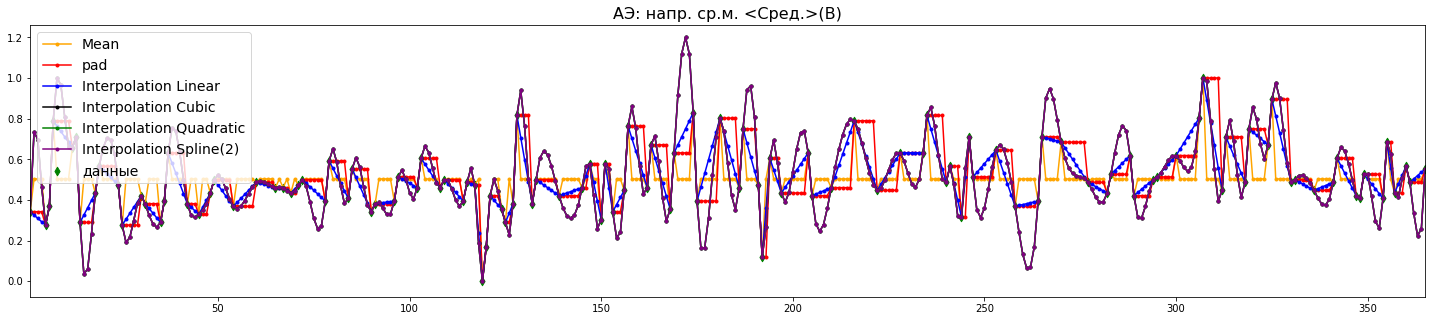

In [42]:
fig, ax = plt.subplots(figsize=(25,5))

ax.scatter(x1,y1, color='green', marker='d', label='данные')

ax.plot(xWhole,yWholeMean, color='orange', marker='.', label='Mean')
#ax.plot(xWhole,yWholeMedian, color='orange', marker='.', label='Median')
ax.plot(xWhole,yPad.values, color='red', marker='.', label='pad')
ax.plot(xWhole,yIntLin.values, color='blue', marker='.', label='Interpolation Linear')
ax.plot(xWhole,yIntCubic.values, color='black', marker='.', label='Interpolation Cubic')
ax.plot(xWhole,yIntCubic.values, color='green', marker='.', label='Interpolation Quadratic')
ax.plot(xWhole,yIntCubic.values, color='purple', marker='.', label='Interpolation Spline(2)')
ax.set_xlim(1,365)
#ax.set_xlim(100,130)
ax.legend(fontsize=14)
ax.set_title(fullNamesInRussian[paramNames.index('AE3')], fontsize=16)
plt.savefig('report_v2/missingValuesInterpollated_AE3.png', dpi=300, bbox_inches='tight')
plt.show()

## варианты заполнения TIME5

In [43]:
y1=dataScaled[0]['TIME5'][dataScaled[0]['TIME5'].notna()].values
x1=dataScaled[0]['TIME5'][dataScaled[0]['TIME5'].notna()].index+1

xEmpty=dataScaled[0]['TIME5'][dataScaled[0]['TIME5'].isnull()].index+1
yMean=np.array(len(xEmpty)*[np.mean(y1)])
yMedian=np.array(len(xEmpty)*[np.median(y1)])

xWhole=np.concatenate((x1,xEmpty), axis=None)
yWholeMean=np.concatenate((y1,yMean), axis=None)[xWhole.argsort()]
yWholeMedian=np.concatenate((y1,yMedian), axis=None)[xWhole.argsort()]
xWhole=xWhole[xWhole.argsort()]

dataTIME5=dataScaled[0]['TIME5'].copy()
yPad=dataTIME5.fillna(method='pad').copy()
yIntLin=dataTIME5.interpolate(method='linear').copy()
yIntCubic=dataTIME5.interpolate(method='cubic').copy()
yIntQuadr=dataTIME5.interpolate(method='quadratic').copy()
yIntSpline=dataTIME5.interpolate(method='spline', order=2).copy()

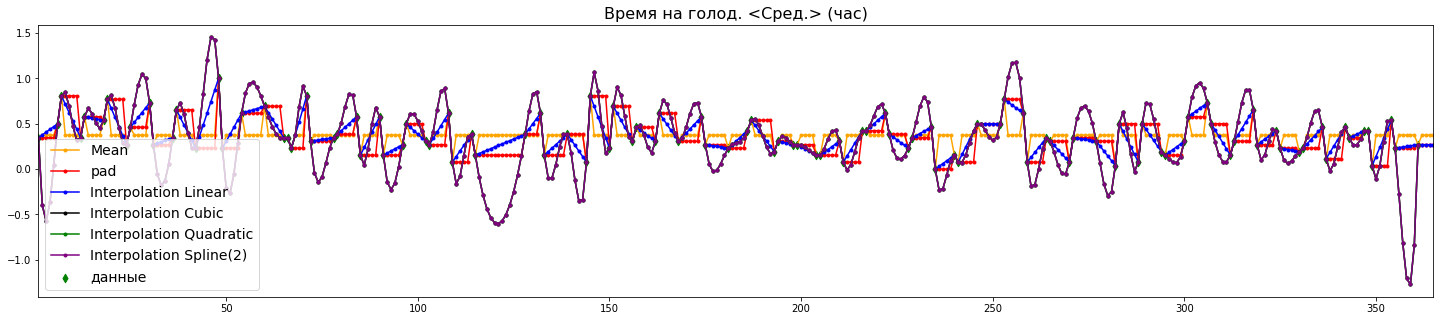

In [44]:
fig, ax = plt.subplots(figsize=(25,5))

ax.scatter(x1,y1, color='green', marker='d', label='данные')

ax.plot(xWhole,yWholeMean, color='orange', marker='.', label='Mean')
#ax.plot(xWhole,yWholeMedian, color='orange', marker='.', label='Median')
ax.plot(xWhole,yPad.values, color='red', marker='.', label='pad')
ax.plot(xWhole,yIntLin.values, color='blue', marker='.', label='Interpolation Linear')
ax.plot(xWhole,yIntCubic.values, color='black', marker='.', label='Interpolation Cubic')
ax.plot(xWhole,yIntCubic.values, color='green', marker='.', label='Interpolation Quadratic')
ax.plot(xWhole,yIntCubic.values, color='purple', marker='.', label='Interpolation Spline(2)')
ax.set_xlim(1,365)
#ax.set_xlim(100,130)
ax.legend(fontsize=14)
ax.set_title(fullNamesInRussian[paramNames.index('TIME5')], fontsize=16)
plt.savefig('report_v2/missingValuesInterpollated_TIME5.png', dpi=300, bbox_inches='tight')
plt.show()

## варианты заполнения NAST

In [45]:
y1=dataScaled[0]['NAST'][dataScaled[0]['NAST'].notna()].values
x1=dataScaled[0]['NAST'][dataScaled[0]['NAST'].notna()].index+1

xEmpty=dataScaled[0]['NAST'][dataScaled[0]['NAST'].isnull()].index+1
yMean=np.array(len(xEmpty)*[np.mean(y1)])
yMedian=np.array(len(xEmpty)*[np.median(y1)])

xWhole=np.concatenate((x1,xEmpty), axis=None)
yWholeMean=np.concatenate((y1,yMean), axis=None)[xWhole.argsort()]
yWholeMedian=np.concatenate((y1,yMedian), axis=None)[xWhole.argsort()]
xWhole=xWhole[xWhole.argsort()]

dataNAST=dataScaled[0]['NAST'].copy()
yPad=dataNAST.fillna(method='pad').copy()
yIntLin=dataNAST.interpolate(method='linear').copy()
yIntCubic=dataNAST.interpolate(method='cubic').copy()
yIntQuadr=dataNAST.interpolate(method='quadratic').copy()
yIntSpline=dataNAST.interpolate(method='spline', order=2).copy()

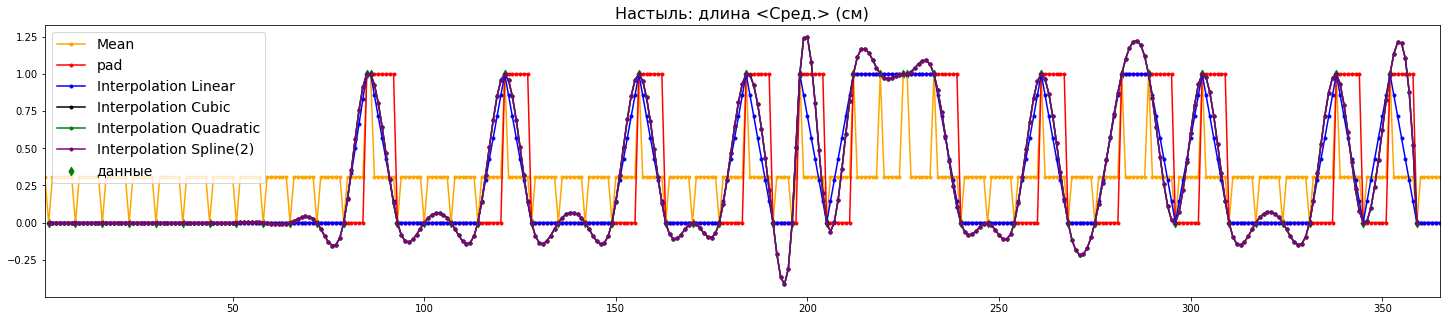

In [46]:
fig, ax = plt.subplots(figsize=(25,5))

ax.scatter(x1,y1, color='green', marker='d', label='данные')

ax.plot(xWhole,yWholeMean, color='orange', marker='.', label='Mean')
#ax.plot(xWhole,yWholeMedian, color='orange', marker='.', label='Median')
ax.plot(xWhole,yPad.values, color='red', marker='.', label='pad')
ax.plot(xWhole,yIntLin.values, color='blue', marker='.', label='Interpolation Linear')
ax.plot(xWhole,yIntCubic.values, color='black', marker='.', label='Interpolation Cubic')
ax.plot(xWhole,yIntCubic.values, color='green', marker='.', label='Interpolation Quadratic')
ax.plot(xWhole,yIntCubic.values, color='purple', marker='.', label='Interpolation Spline(2)')
ax.set_xlim(1,365)
#ax.set_xlim(100,130)
ax.legend(fontsize=14)
ax.set_title(fullNamesInRussian[paramNames.index('NAST')], fontsize=16)
plt.savefig('report_v2/missingValuesInterpollated_NAST.png', dpi=300, bbox_inches='tight')
plt.show()

## варианты заполнения POD

In [47]:
y1=dataScaled[0]['POD'][dataScaled[0]['POD'].notna()].values
x1=dataScaled[0]['POD'][dataScaled[0]['POD'].notna()].index+1

xEmpty=dataScaled[0]['POD'][dataScaled[0]['POD'].isnull()].index+1
yMean=np.array(len(xEmpty)*[np.mean(y1)])
yMedian=np.array(len(xEmpty)*[np.median(y1)])

xWhole=np.concatenate((x1,xEmpty), axis=None)
yWholeMean=np.concatenate((y1,yMean), axis=None)[xWhole.argsort()]
yWholeMedian=np.concatenate((y1,yMedian), axis=None)[xWhole.argsort()]
xWhole=xWhole[xWhole.argsort()]

dataPOD=dataScaled[0]['POD'].copy()
yPad=dataPOD.fillna(method='pad').copy()
yIntLin=dataPOD.interpolate(method='linear').copy()
yIntCubic=dataPOD.interpolate(method='cubic').copy()
yIntQuadr=dataPOD.interpolate(method='quadratic').copy()
yIntSpline=dataPOD.interpolate(method='spline', order=2).copy()

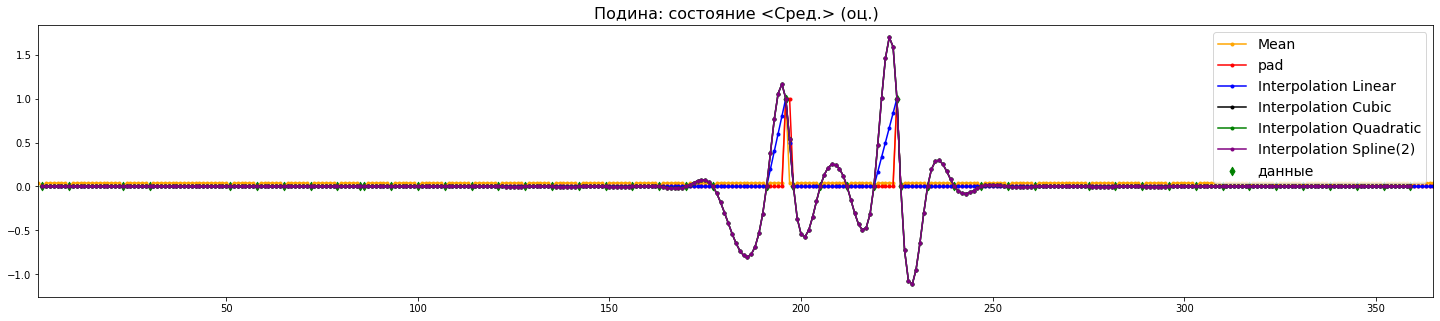

In [48]:
fig, ax = plt.subplots(figsize=(25,5))

ax.scatter(x1,y1, color='green', marker='d', label='данные')

ax.plot(xWhole,yWholeMean, color='orange', marker='.', label='Mean')
#ax.plot(xWhole,yWholeMedian, color='orange', marker='.', label='Median')
ax.plot(xWhole,yPad.values, color='red', marker='.', label='pad')
ax.plot(xWhole,yIntLin.values, color='blue', marker='.', label='Interpolation Linear')
ax.plot(xWhole,yIntCubic.values, color='black', marker='.', label='Interpolation Cubic')
ax.plot(xWhole,yIntCubic.values, color='green', marker='.', label='Interpolation Quadratic')
ax.plot(xWhole,yIntCubic.values, color='purple', marker='.', label='Interpolation Spline(2)')
ax.set_xlim(1,365)
#ax.set_xlim(100,130)
ax.legend(fontsize=14)
ax.set_title(fullNamesInRussian[paramNames.index('POD')], fontsize=16)
plt.savefig('report_v2/missingValuesInterpollated_POD.png', dpi=300, bbox_inches='tight')
plt.show()

## варианты заполнения ERATE

In [49]:
y1=dataScaled[0]['ERATE'][dataScaled[0]['ERATE'].notna()].values
x1=dataScaled[0]['ERATE'][dataScaled[0]['ERATE'].notna()].index+1

xEmpty=dataScaled[0]['ERATE'][dataScaled[0]['ERATE'].isnull()].index+1
yMean=np.array(len(xEmpty)*[np.mean(y1)])
yMedian=np.array(len(xEmpty)*[np.median(y1)])

xWhole=np.concatenate((x1,xEmpty), axis=None)
yWholeMean=np.concatenate((y1,yMean), axis=None)[xWhole.argsort()]
yWholeMedian=np.concatenate((y1,yMedian), axis=None)[xWhole.argsort()]
xWhole=xWhole[xWhole.argsort()]

dataERATE=dataScaled[0]['ERATE'].copy()
yPad=dataERATE.fillna(method='pad').copy()
yIntLin=dataERATE.interpolate(method='linear').copy()
yIntCubic=dataERATE.interpolate(method='cubic').copy()
yIntQuadr=dataERATE.interpolate(method='quadratic').copy()
yIntSpline=dataERATE.interpolate(method='spline', order=2).copy()

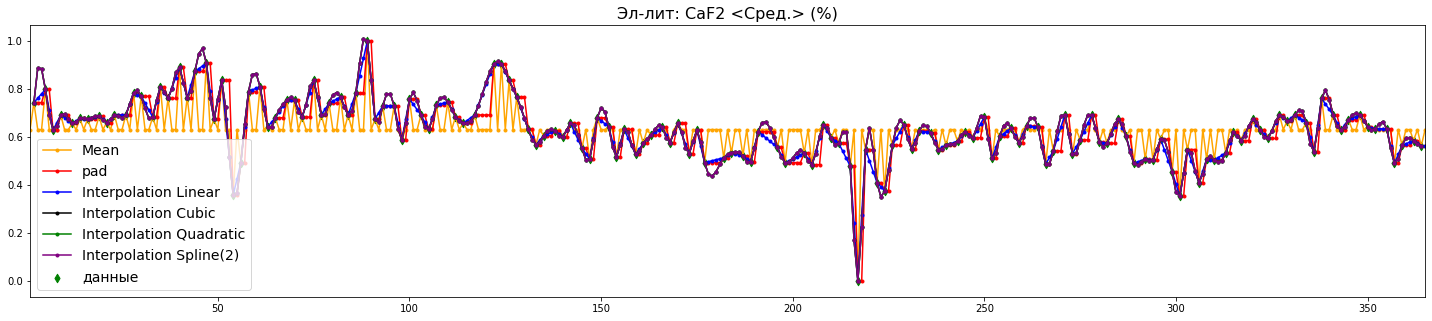

In [50]:
fig, ax = plt.subplots(figsize=(25,5))

ax.scatter(x1,y1, color='green', marker='d', label='данные')

ax.plot(xWhole,yWholeMean, color='orange', marker='.', label='Mean')
#ax.plot(xWhole,yWholeMedian, color='orange', marker='.', label='Median')
ax.plot(xWhole,yPad.values, color='red', marker='.', label='pad')
ax.plot(xWhole,yIntLin.values, color='blue', marker='.', label='Interpolation Linear')
ax.plot(xWhole,yIntCubic.values, color='black', marker='.', label='Interpolation Cubic')
ax.plot(xWhole,yIntCubic.values, color='green', marker='.', label='Interpolation Quadratic')
ax.plot(xWhole,yIntCubic.values, color='purple', marker='.', label='Interpolation Spline(2)')
ax.set_xlim(1,365)
#ax.set_xlim(100,130)
ax.legend(fontsize=14)
ax.set_title(fullNamesInRussian[paramNames.index('ERATE')], fontsize=16)
plt.savefig('report_v2/missingValuesInterpollated_ERATE.png', dpi=300, bbox_inches='tight')
plt.show()

## варианты заполнения EKO

In [51]:
y1=dataScaled[0]['EKO'][dataScaled[0]['EKO'].notna()].values
x1=dataScaled[0]['EKO'][dataScaled[0]['EKO'].notna()].index+1

xEmpty=dataScaled[0]['EKO'][dataScaled[0]['EKO'].isnull()].index+1
yMean=np.array(len(xEmpty)*[np.mean(y1)])
yMedian=np.array(len(xEmpty)*[np.median(y1)])

xWhole=np.concatenate((x1,xEmpty), axis=None)
yWholeMean=np.concatenate((y1,yMean), axis=None)[xWhole.argsort()]
yWholeMedian=np.concatenate((y1,yMedian), axis=None)[xWhole.argsort()]
xWhole=xWhole[xWhole.argsort()]

dataEKO=dataScaled[0]['EKO'].copy()
yPad=dataEKO.fillna(method='pad').copy()
yIntLin=dataEKO.interpolate(method='linear').copy()
yIntCubic=dataEKO.interpolate(method='cubic').copy()
yIntQuadr=dataEKO.interpolate(method='quadratic').copy()
yIntSpline=dataEKO.interpolate(method='spline', order=2).copy()

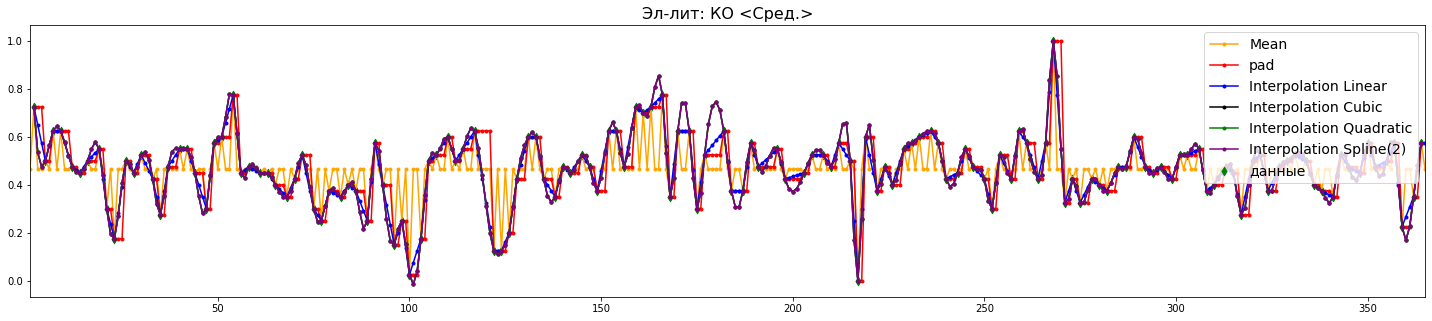

In [52]:
fig, ax = plt.subplots(figsize=(25,5))

ax.scatter(x1,y1, color='green', marker='d', label='данные')

ax.plot(xWhole,yWholeMean, color='orange', marker='.', label='Mean')
#ax.plot(xWhole,yWholeMedian, color='orange', marker='.', label='Median')
ax.plot(xWhole,yPad.values, color='red', marker='.', label='pad')
ax.plot(xWhole,yIntLin.values, color='blue', marker='.', label='Interpolation Linear')
ax.plot(xWhole,yIntCubic.values, color='black', marker='.', label='Interpolation Cubic')
ax.plot(xWhole,yIntCubic.values, color='green', marker='.', label='Interpolation Quadratic')
ax.plot(xWhole,yIntCubic.values, color='purple', marker='.', label='Interpolation Spline(2)')
ax.set_xlim(1,365)
ax.legend(fontsize=14)
ax.set_title(fullNamesInRussian[paramNames.index('EKO')], fontsize=16)
plt.savefig('report_v2/missingValuesInterpollated_EKO.png', dpi=300, bbox_inches='tight')
plt.show()

# Выводы:
NAST - только 2 значения, интерполяция исказит данные. Без доп.анализа, заполнить случайно с распределением исходных значений.<br>
POD почти всегда 1 значение, 2е значение пару раз. интерполяция исказит данные, стоит заполнить наиболее часто встречающимся значением <br>
Для остальных использовать линейную интерполяцию. Нелинейные могут двать "пики", огибающие даные за пределами интервалов значений (искажение данных)

In [44]:
totalNum=dataScaled[0]['NAST'].value_counts().iat[0]+dataScaled[0]['NAST'].value_counts().iat[1]
total0=dataScaled[0]['NAST'].value_counts().iat[0]
total1=dataScaled[0]['NAST'].value_counts().iat[1]
p0=total0/totalNum
p1=total1/totalNum
print('p0=',p0,'p1=',p1)

p0= 0.6909090909090909 p1= 0.3090909090909091


In [45]:
dataScaled[4]['POD'].value_counts()

0.0    50
Name: POD, dtype: int64

In [46]:
for i in range(5):

    totalNum=dataScaled[i]['NAST'].value_counts().iat[0]+dataScaled[i]['NAST'].value_counts().iat[1]
    total0=dataScaled[i]['NAST'].value_counts().iat[0]
    total1=dataScaled[i]['NAST'].value_counts().iat[1]
    # распределение значений NAST
    p0=total0/totalNum
    p1=total1/totalNum

    for j in range(365):
        # заполнить в соответсвии с распределением
        if np.isnan(dataScaled[i]['NAST'].iat[j]):
            if np.random.rand()<=p0:
                dataScaled[i]['NAST'].iat[j]=0.0
            else:
                dataScaled[i]['NAST'].iat[j]=1.0
        # заполнить наиболее встречающимся значением
        if np.isnan(dataScaled[i]['POD'].iat[j]):
            dataScaled[i]['POD'].iat[j]=0.0
    

    for k in dataScaled[i].columns:
        if dataScaled[i][k].count()<365:
            if np.isnan(dataScaled[i][k].iat[0])==True:
                # для интерполяции нужно первое значение в массиве
                dataScaled[i][k].iat[0]=dataScaled[i][k].median()
            dataScaled[i][k] = dataScaled[i][k].interpolate(method='linear').copy()

In [47]:
data5in1=dataScaled[0].copy()
for i in range(4):
    data5in1=data5in1.append(dataScaled[i+1], ignore_index=True)
data5in1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 32 columns):
AE1         1825 non-null float64
AE2         1825 non-null float64
AE3         1825 non-null float64
TIME1       1825 non-null float64
TIME2       1825 non-null float64
TIME3       1825 non-null float64
TIME5       1825 non-null float64
KOL1        1825 non-null float64
KOL2        1825 non-null float64
KOL3        1825 non-null float64
U1          1825 non-null float64
U2          1825 non-null float64
NAST        1825 non-null float64
POD         1825 non-null float64
RMPR1       1825 non-null float64
RMPR2       1825 non-null float64
RMPR3       1825 non-null float64
RMPR4       1825 non-null float64
RMPR5       1825 non-null float64
ETEMP       1825 non-null float64
METAL       1825 non-null float64
ELEVEL      1825 non-null float64
NOISE       1825 non-null float64
ERATE       1825 non-null float64
EKO         1825 non-null float64
AIF3        1825 non-null float64
UANOD    

In [49]:
# сохраним данные заполненные интерполяцией
dataScaled[0].to_csv('baths_v2/interpolateDataBath1001.csv', index=False)
dataScaled[1].to_csv('baths_v2/interpolateDataBath1003.csv', index=False)
dataScaled[2].to_csv('baths_v2/interpolateDataBath1004.csv', index=False)
dataScaled[3].to_csv('baths_v2/interpolateDataBath1005.csv', index=False)
dataScaled[4].to_csv('baths_v2/interpolateDataBath1006.csv', index=False)
data5in1.to_csv('baths_v2/interpolateData5in1.csv', index=False)

# Некоторые модели машинного обучения по данным $ X(t) \rightarrow Y(t) $

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV

In [25]:
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression

In [26]:
train=[None]*5
test=[None]*5
for i in range(5):
    train[i], test[i] = train_test_split(dataScaled[i], test_size=0.25)
train5in1, test5in1 = train_test_split(data5in1, test_size=0.25)

## линейная модель (оценка снизу)

In [27]:
# для параметра EKO
modelLinearEKO=[None]*6
rmseLinearEKO=[None]*6
r2scoreLinearEKO=[None]*6

# для параметра ETEMP
modelLinearETEMP=[None]*6
rmseLinearETEMP=[None]*6
r2scoreLinearETEMP=[None]*6

for i in range(5):
    
    # по параметру EKO по ваннам
    trainInputsEKO = train[i].drop(columns=['EKO','ETEMP']).values
    testInputsEKO = test[i].drop(columns=['EKO','ETEMP']).values
    trainTargetsEKO = train[i]['EKO'].values
    testTargetsEKO = test[i]['EKO'].values
    
    modelLinearEKO[i] = LinearRegression()
    modelLinearEKO[i].fit(trainInputsEKO,trainTargetsEKO)
    predictedEKO = modelLinearEKO[i].predict(testInputsEKO)
    
    rmseLinearEKO[i] = mean_squared_error(testTargetsEKO, predictedEKO, squared=False)
    r2scoreLinearEKO[i] = r2_score(testTargetsEKO, predictedEKO)

    # по параметру ETEMP по ваннам
    trainInputsETEMP = train[i].drop(columns=['EKO','ETEMP']).values
    testInputsETEMP = test[i].drop(columns=['EKO','ETEMP']).values
    trainTargetsETEMP = train[i]['ETEMP'].values
    testTargetsETEMP = test[i]['ETEMP'].values
    
    modelLinearETEMP[i] = LinearRegression()
    modelLinearETEMP[i].fit(trainInputsETEMP,trainTargetsETEMP)
    predictedETEMP = modelLinearETEMP[i].predict(testInputsETEMP)
    
    rmseLinearETEMP[i] = mean_squared_error(testTargetsETEMP, predictedETEMP, squared=False)
    r2scoreLinearETEMP[i] = r2_score(testTargetsETEMP, predictedETEMP)

# по параметру EKO 5-в-1
trainInputs5in1EKO = train5in1.drop(columns=['EKO','ETEMP']).values
testInputs5in1EKO = test5in1.drop(columns=['EKO','ETEMP']).values
trainTargets5in1EKO = train5in1['EKO'].values
testTargets5in1EKO = test5in1['EKO'].values

modelLinearEKO[5] = LinearRegression()
modelLinearEKO[5].fit(trainInputs5in1EKO, trainTargets5in1EKO)
predictedEKO = modelLinearEKO[5].predict(testInputs5in1EKO)

rmseLinearEKO[5] = mean_squared_error(testTargets5in1EKO, predictedEKO, squared=False)
r2scoreLinearEKO[5] = r2_score(testTargets5in1EKO, predictedEKO)

# по параметру ETEMP 5-в-1
trainInputs5in1ETEMP = train5in1.drop(columns=['EKO','ETEMP']).values
testInputs5in1ETEMP = test5in1.drop(columns=['EKO','ETEMP']).values
trainTargets5in1ETEMP = train5in1['ETEMP'].values
testTargets5in1ETEMP = test5in1['ETEMP'].values

modelLinearETEMP[5] = LinearRegression()
modelLinearETEMP[5].fit(trainInputs5in1ETEMP, trainTargets5in1ETEMP)
predictedETEMP = modelLinearETEMP[5].predict(testInputs5in1ETEMP)

rmseLinearETEMP[5] = mean_squared_error(testTargets5in1ETEMP, predictedETEMP, squared=False)
r2scoreLinearETEMP[5] = r2_score(testTargets5in1ETEMP, predictedETEMP)

In [29]:
print('Результаты линейной регрессии для прогноза EKO')
for i in range(6):
    if i<5:
        print( "Ванна %s: RMSE = %.6f, R2_score = %.6f" % (bathNumber[i],rmseLinearEKO[i],r2scoreLinearEKO[i]) )
    else:
        print( "Данные всех ванн: RMSE = %.6f, R2_score = %.6f" % (rmseLinearEKO[i],r2scoreLinearEKO[i]) )

print('\nРезультаты линейной регрессии для прогноза ETEMP')
for i in range(6):
    if i<5:
        print( "Ванна %s: RMSE = %.6f, R2_score = %.6f" % (bathNumber[i],rmseLinearETEMP[i],r2scoreLinearETEMP[i]) )
    else:
        print( "Данные всех ванн: RMSE = %.6f, R2_score = %.6f" % (rmseLinearETEMP[i],r2scoreLinearETEMP[i]) )

Результаты линейной регрессии для прогноза EKO
Ванна 1001: RMSE = 0.104344, R2_score = 0.270037
Ванна 1003: RMSE = 0.090316, R2_score = 0.509042
Ванна 1004: RMSE = 0.158750, R2_score = 0.336701
Ванна 1005: RMSE = 0.128450, R2_score = 0.410896
Ванна 1006: RMSE = 0.145883, R2_score = 0.247936
Данные всех ванн: RMSE = 0.140174, R2_score = 0.419929

Результаты линейной регрессии для прогноза ETEMP
Ванна 1001: RMSE = 0.137327, R2_score = 0.288585
Ванна 1003: RMSE = 0.112858, R2_score = 0.532038
Ванна 1004: RMSE = 0.125547, R2_score = 0.311895
Ванна 1005: RMSE = 0.125408, R2_score = 0.474193
Ванна 1006: RMSE = 0.120231, R2_score = 0.580550
Данные всех ванн: RMSE = 0.115568, R2_score = 0.499332


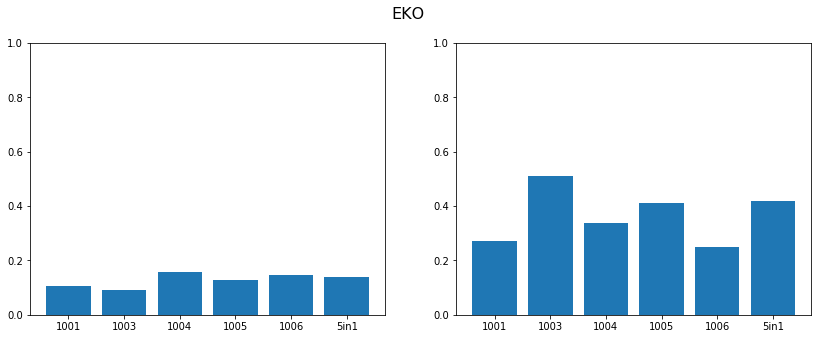

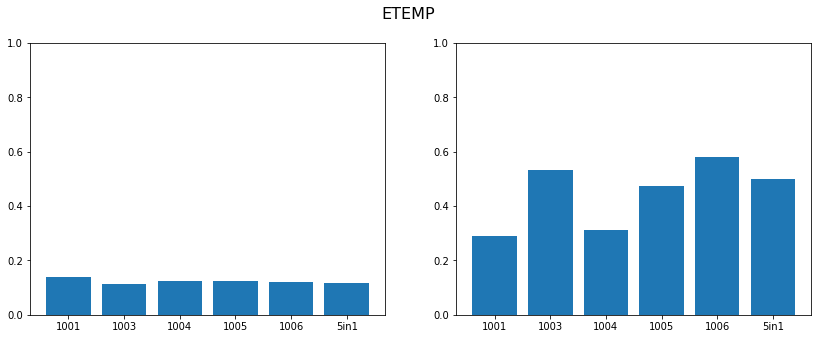

In [30]:
labelsBars=bathNumber[:]
labelsBars.append('5in1')

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
ax[0].bar([0,1,2,3,4,5],rmseLinearEKO, tick_label=labelsBars)
ax[0].set_ylim(0,1)
ax[1].bar([0,1,2,3,4,5],r2scoreLinearEKO, tick_label=labelsBars)
ax[1].set_ylim(np.min([0, np.min([r2scoreLinearEKO])]),1)
fig.suptitle('EKO', fontsize=16)
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
ax[0].bar([0,1,2,3,4,5],rmseLinearETEMP, tick_label=labelsBars)
ax[0].set_ylim(0,1)
ax[1].bar([0,1,2,3,4,5],r2scoreLinearETEMP, tick_label=labelsBars)
ax[1].set_ylim(np.min([0, np.min([r2scoreLinearETEMP])]) ,1)
fig.suptitle('ETEMP', fontsize=16)
plt.show()

# метод главных компонент и линейная регрессия

In [33]:
# пример 1001
i=0
inputpsPCA = dataScaled[i].drop(columns=['EKO','ETEMP']).values
targetsEKO = dataScaled[i]['EKO'].values
targetsETEMP = dataScaled[i]['ETEMP'].values

pcaM=PCA()
newInputpsPCA=pcaM.fit_transform(inputpsPCA)

In [34]:
print(np.array_str(pcaM.explained_variance_ratio_*100, precision=2, suppress_small=True))

[23.58 17.09 11.04  8.74  5.12  4.73  4.07  3.77  3.19  3.13  2.45  2.35
  2.08  1.55  1.22  1.15  0.96  0.83  0.62  0.6   0.56  0.36  0.26  0.18
  0.14  0.11  0.09  0.04]


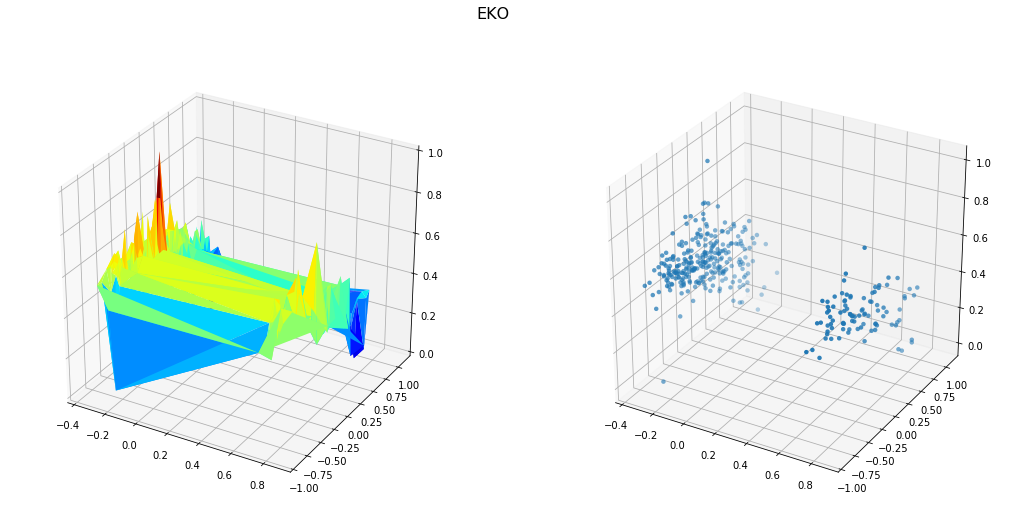

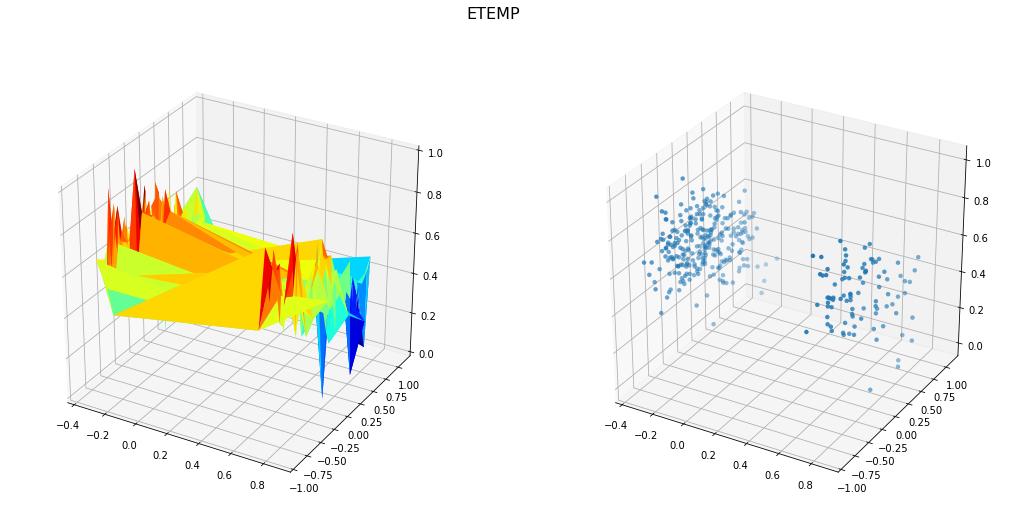

In [35]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(121, projection='3d')
ax.plot_trisurf(newInputpsPCA[:,0],newInputpsPCA[:,1],
            targetsEKO, cmap=cm.jet, linewidth=0)
ax = fig.add_subplot(122, projection='3d')

ax.scatter(newInputpsPCA[:,0],newInputpsPCA[:,1],
            targetsEKO, cmap=cm.jet, linewidth=0)
plt.suptitle('EKO', fontsize=16)
plt.show()

fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(121, projection='3d')
ax.plot_trisurf(newInputpsPCA[:,0],newInputpsPCA[:,1],
            targetsETEMP, cmap=cm.jet, linewidth=0)
ax = fig.add_subplot(122, projection='3d')

ax.scatter(newInputpsPCA[:,0],newInputpsPCA[:,1],
            targetsETEMP, cmap=cm.jet, linewidth=0)
plt.suptitle('ETEMP', fontsize=16)
plt.show()

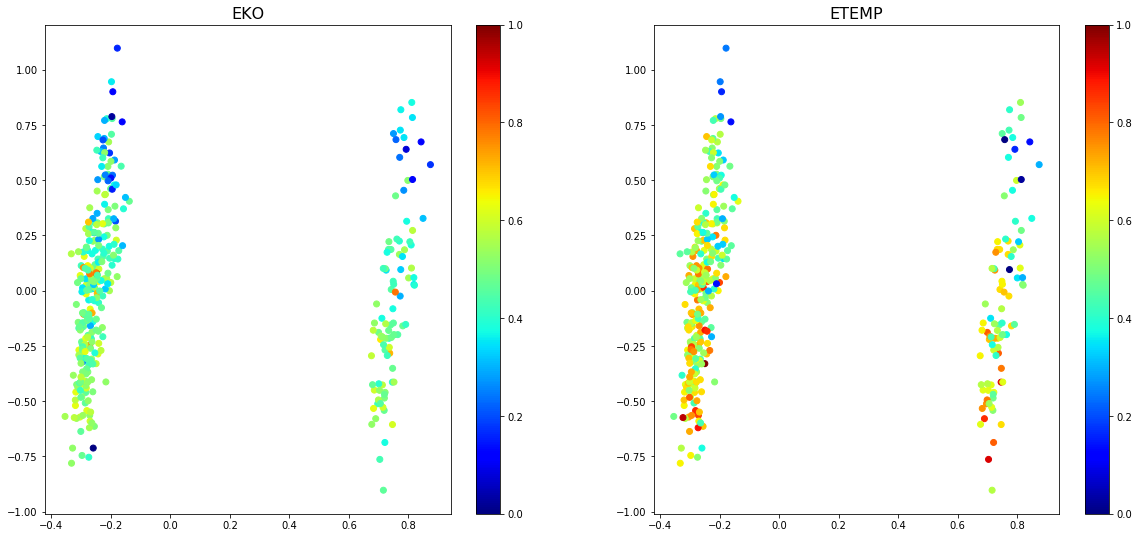

In [36]:
fig, ax = plt.subplots( figsize=(20,9), ncols=2)
ax1=ax[0].scatter(newInputpsPCA[:,0],newInputpsPCA[:,1], c=targetsEKO, cmap=cm.jet)
ax2=ax[1].scatter(newInputpsPCA[:,0],newInputpsPCA[:,1], c=targetsETEMP, cmap=cm.jet)
ax[0].set_title('EKO', fontsize=16)
ax[1].set_title('ETEMP', fontsize=16)
fig.colorbar(ax1, ax=ax[0])
fig.colorbar(ax2, ax=ax[1])
plt.show()

In [38]:
inputpsPCA = data5in1.drop(columns=['EKO','ETEMP']).values
targetsEKO = data5in1['EKO'].values
targetsETEMP = data5in1['ETEMP'].values

pcaM=PCA()
newInputpsPCA=pcaM.fit_transform(inputpsPCA)

In [40]:
print(np.array_str(pcaM.explained_variance_ratio_*100, precision=2, suppress_small=True))

[23.11 13.08  9.43  7.73  6.63  5.73  4.42  4.04  3.64  3.18  2.85  2.44
  2.12  1.82  1.57  1.52  1.36  1.2   1.02  0.89  0.6   0.45  0.39  0.22
  0.19  0.17  0.11  0.09]


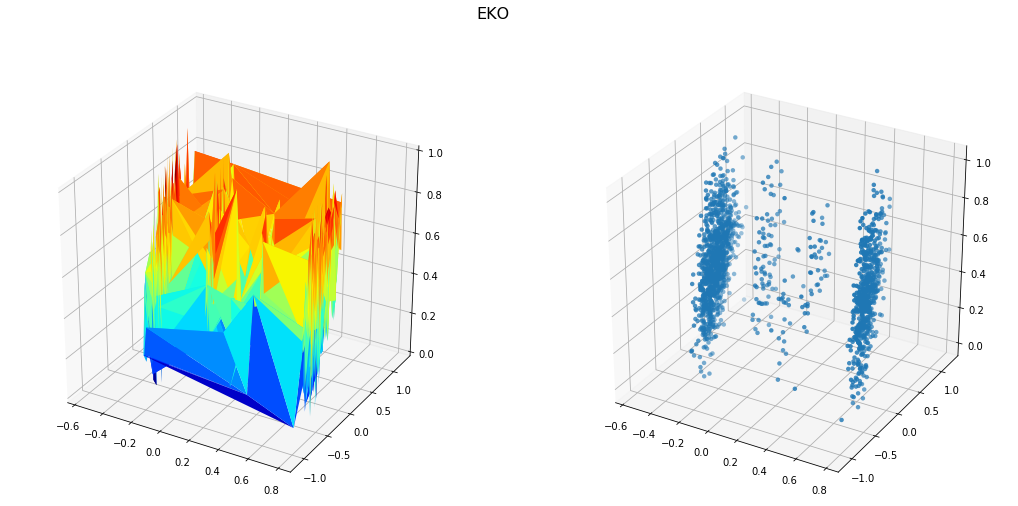

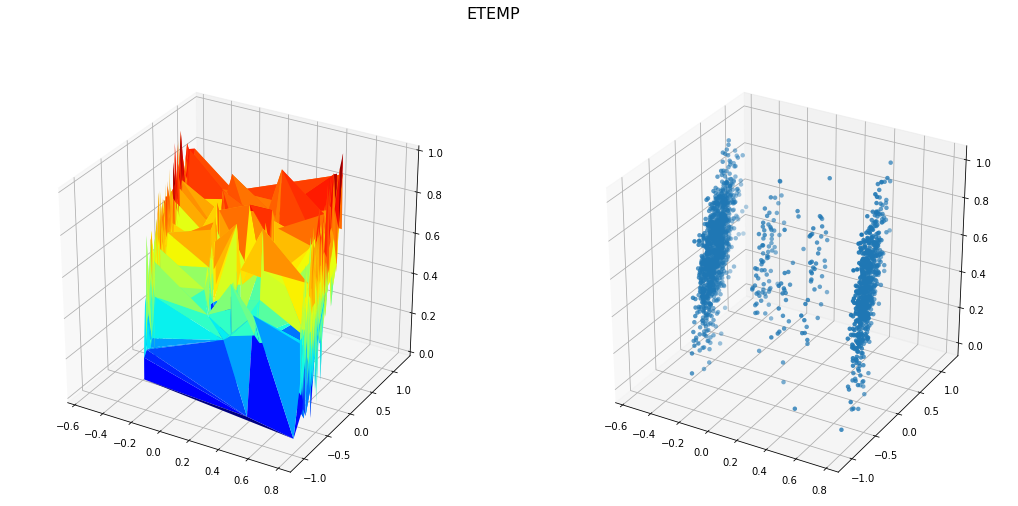

In [39]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(121, projection='3d')
ax.plot_trisurf(newInputpsPCA[:,0],newInputpsPCA[:,1],
            targetsEKO, cmap=cm.jet, linewidth=0)
ax = fig.add_subplot(122, projection='3d')

ax.scatter(newInputpsPCA[:,0],newInputpsPCA[:,1],
            targetsEKO, cmap=cm.jet, linewidth=0)
plt.suptitle('EKO', fontsize=16)
plt.show()

fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(121, projection='3d')
ax.plot_trisurf(newInputpsPCA[:,0],newInputpsPCA[:,1],
            targetsETEMP, cmap=cm.jet, linewidth=0)
ax = fig.add_subplot(122, projection='3d')

ax.scatter(newInputpsPCA[:,0],newInputpsPCA[:,1],
            targetsETEMP, cmap=cm.jet, linewidth=0)
plt.suptitle('ETEMP', fontsize=16)
plt.show()

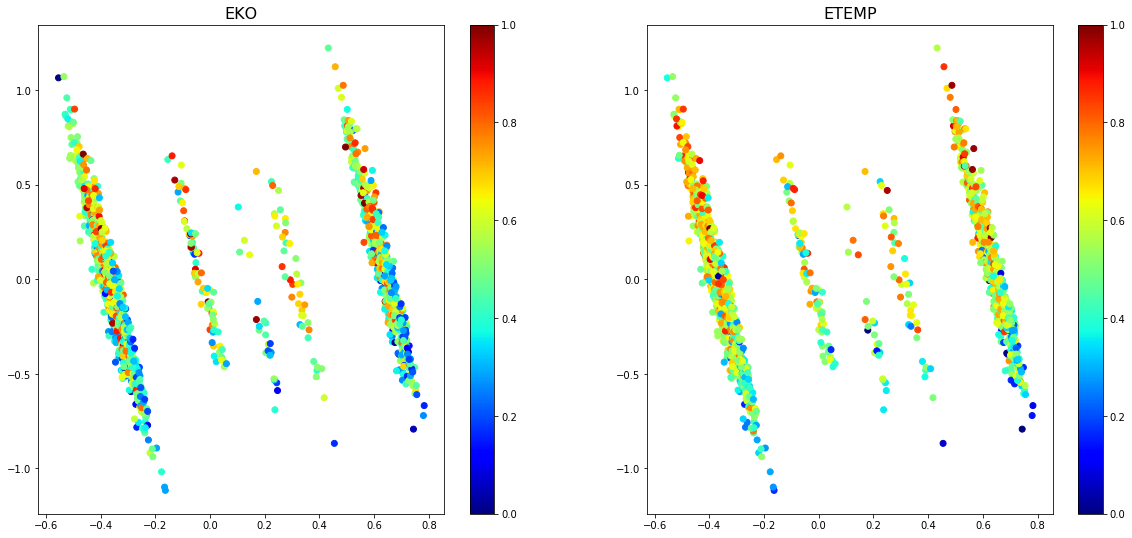

In [41]:
fig, ax = plt.subplots( figsize=(20,9), ncols=2)
ax1=ax[0].scatter(newInputpsPCA[:,0],newInputpsPCA[:,1], c=targetsEKO, cmap=cm.jet)
ax2=ax[1].scatter(newInputpsPCA[:,0],newInputpsPCA[:,1], c=targetsETEMP, cmap=cm.jet)
ax[0].set_title('EKO', fontsize=16)
ax[1].set_title('ETEMP', fontsize=16)
fig.colorbar(ax1, ax=ax[0])
fig.colorbar(ax2, ax=ax[1])
plt.show()

In [46]:
def gridSerchPCALinearModel(n):

    pcaDataScImpMean=[None]*5
    for i in range(5):
        pcaModel=PCA(n_components=n)
        pcaDataScImpMean[i]=pcaModel.fit_transform(dataScaled[i].drop(columns=['EKO','ETEMP']))
        pcaDataScImpMean[i]=pd.DataFrame(pcaDataScImpMean[i])
        pcaDataScImpMean[i]['EKO']=dataScaled[i]['EKO'].copy()
        pcaDataScImpMean[i]['ETEMP']=dataScaled[i]['ETEMP'].copy()
    pcaModel=PCA(n_components=n)
    pcaData5in1ScImpMean=pcaModel.fit_transform(data5in1.drop(columns=['EKO','ETEMP']))
    pcaData5in1ScImpMean=pd.DataFrame(pcaData5in1ScImpMean)
    pcaData5in1ScImpMean['EKO']=data5in1['EKO'].copy()
    pcaData5in1ScImpMean['ETEMP']=data5in1['ETEMP'].copy()

    trainPCAImpMean=[None]*5
    testPCAImpMean=[None]*5
    for i in range(5):
        trainPCAImpMean[i], testPCAImpMean[i] = train_test_split(pcaDataScImpMean[i], test_size=0.25)
    trainPCA5in1ImpMean, testPCA5in1ImpMean = train_test_split(pcaData5in1ScImpMean, test_size=0.25)

    modelPCALinearMeanEKO=[None]*6
    rmsePCALinearMeanEKO=[None]*6
    r2scorePCALinearMeanEKO=[None]*6

    modelPCALinearMeanETEMP=[None]*6
    rmsePCALinearMeanETEMP=[None]*6
    r2scorePCALinearMeanETEMP=[None]*6

    for i in range(5):
        
        # по параметру EKO по ваннам
        trainInputsEKO = trainPCAImpMean[i].drop(columns=['EKO','ETEMP']).values
        testInputsEKO = testPCAImpMean[i].drop(columns=['EKO','ETEMP']).values
        trainTargetsEKO = trainPCAImpMean[i]['EKO'].values
        testTargetsEKO = testPCAImpMean[i]['EKO'].values
        
        modelPCALinearMeanEKO[i] = LinearRegression()
        modelPCALinearMeanEKO[i].fit(trainInputsEKO,trainTargetsEKO)
        predictedEKO = modelPCALinearMeanEKO[i].predict(testInputsEKO)
        
        rmsePCALinearMeanEKO[i] = mean_squared_error(testTargetsEKO, predictedEKO, squared=False)
        r2scorePCALinearMeanEKO[i] = r2_score(testTargetsEKO, predictedEKO)

        # по параметру ETEMP по ваннам
        trainInputsETEMP = trainPCAImpMean[i].drop(columns=['EKO','ETEMP']).values
        testInputsETEMP = testPCAImpMean[i].drop(columns=['EKO','ETEMP']).values
        trainTargetsETEMP = trainPCAImpMean[i]['ETEMP'].values
        testTargetsETEMP = testPCAImpMean[i]['ETEMP'].values
        
        modelPCALinearMeanETEMP[i] = LinearRegression()
        modelPCALinearMeanETEMP[i].fit(trainInputsETEMP,trainTargetsETEMP)
        predictedETEMP = modelPCALinearMeanETEMP[i].predict(testInputsETEMP)
        
        rmsePCALinearMeanETEMP[i] = mean_squared_error(testTargetsETEMP, predictedETEMP, squared=False)
        r2scorePCALinearMeanETEMP[i] = r2_score(testTargetsETEMP, predictedETEMP)

    # по параметру EKO 5-в-1
    trainInputs5in1EKO = trainPCA5in1ImpMean.drop(columns=['EKO','ETEMP']).values
    testInputs5in1EKO = testPCA5in1ImpMean.drop(columns=['EKO','ETEMP']).values
    trainTargets5in1EKO = trainPCA5in1ImpMean['EKO'].values
    testTargets5in1EKO = testPCA5in1ImpMean['EKO'].values

    modelPCALinearMeanEKO[5] = LinearRegression()
    modelPCALinearMeanEKO[5].fit(trainInputs5in1EKO, trainTargets5in1EKO)
    predictedEKO = modelPCALinearMeanEKO[5].predict(testInputs5in1EKO)

    rmsePCALinearMeanEKO[5] = mean_squared_error(testTargets5in1EKO, predictedEKO, squared=False)
    r2scorePCALinearMeanEKO[5] = r2_score(testTargets5in1EKO, predictedEKO)

    # по параметру ETEMP 5-в-1
    trainInputs5in1ETEMP = trainPCA5in1ImpMean.drop(columns=['EKO','ETEMP']).values
    testInputs5in1ETEMP = testPCA5in1ImpMean.drop(columns=['EKO','ETEMP']).values
    trainTargets5in1ETEMP = trainPCA5in1ImpMean['ETEMP'].values
    testTargets5in1ETEMP = testPCA5in1ImpMean['ETEMP'].values

    modelPCALinearMeanETEMP[5] = LinearRegression()
    modelPCALinearMeanETEMP[5].fit(trainInputs5in1ETEMP, trainTargets5in1ETEMP)
    predictedETEMP = modelPCALinearMeanETEMP[5].predict(testInputs5in1ETEMP)

    rmsePCALinearMeanETEMP[5] = mean_squared_error(testTargets5in1ETEMP, predictedETEMP, squared=False)
    r2scorePCALinearMeanETEMP[5] = r2_score(testTargets5in1ETEMP, predictedETEMP)

    return rmsePCALinearMeanEKO, r2scorePCALinearMeanEKO, rmsePCALinearMeanETEMP, r2scorePCALinearMeanETEMP 

In [47]:
maxNumCompPCA=len(dataScaled[0].columns)
rezEKO_MSE=[]
rezEKO_R2=[]
rezETEMP_MSE=[]
rezETEMP_R2=[]
for i in range(maxNumCompPCA-1-2):
    _mse1, _r21, _mse2, _r22 = gridSerchPCALinearModel(i+1)
    rezEKO_MSE.append(_mse1)
    rezEKO_R2.append(_r21)
    rezETEMP_MSE.append(_mse2)
    rezETEMP_R2.append(_r22)    

In [48]:
print('EKO:')
print('min MSE =',np.min(rezEKO_MSE))
print('PCA(n) n =', np.ceil(np.argmin(rezEKO_MSE)/6))
print('ETEMP:')
print('min MSE =',np.min(rezETEMP_MSE))
print('PCA(n) n =', np.ceil(np.argmin(rezEKO_MSE)/6))

EKO:
min MSE = 0.08103438677469467
PCA(n) n = 16.0
ETEMP:
min MSE = 0.09056969737899255
PCA(n) n = 16.0


In [50]:
print('EKO:')
print('max R2 =',np.max(rezEKO_R2))
print('PCA(n) n =', np.ceil(np.argmax(rezEKO_R2)/6))
print('ETEMP:')
print('max R2 =',np.max(rezETEMP_R2))
print('PCA(n) n =', np.ceil(np.argmax(rezETEMP_R2)/6))

EKO:
max R2 = 0.5361147311450691
PCA(n) n = 7.0
ETEMP:
max R2 = 0.6910120855353616
PCA(n) n = 25.0


# Модель SVR

## Модель SVR поиск гипер-парамтров по решетке

In [52]:
trainImpMean=[None]*5
testImpMean=[None]*5
for i in range(5):
    trainImpMean[i], testImpMean[i] = train_test_split(dataScaled[i], test_size=0.25)
train5in1ImpMean, test5in1ImpMean = train_test_split(data5in1, test_size=0.25)

In [53]:
modelSVRMeanEKO=[None]*6
rmseSVRMeanEKO=[None]*6
r2scoreSVRMeanEKO=[None]*6

modelSVRMeanETEMP=[None]*6
rmseSVRMeanETEMP=[None]*6
r2scoreSVRMeanETEMP=[None]*6


for i in range(5):
    
    # по параметру EKO по ваннам
    trainInputsEKO = trainImpMean[i].drop(columns=['EKO','ETEMP']).values
    testInputsEKO = testImpMean[i].drop(columns=['EKO','ETEMP']).values
    trainTargetsEKO = trainImpMean[i]['EKO'].values
    testTargetsEKO = testImpMean[i]['EKO'].values
    
    parameters = {'C':[0.1, 0.5, 1, 2.5, 5, 7.5, 10], 'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}
    modelSVR=SVR()
    gridSVR=GridSearchCV(modelSVR, parameters, scoring='neg_root_mean_squared_error')
    gridSVR.fit(trainInputsEKO,trainTargetsEKO)


    modelSVRMeanEKO[i] = gridSVR.best_estimator_
    modelSVRMeanEKO[i].fit(trainInputsEKO,trainTargetsEKO)
    predictedEKO = modelSVRMeanEKO[i].predict(testInputsEKO)
    
    rmseSVRMeanEKO[i] = mean_squared_error(testTargetsEKO, predictedEKO, squared=False)
    r2scoreSVRMeanEKO[i] = r2_score(testTargetsEKO, predictedEKO)

    # по параметру EKO по ваннам
    trainInputsETEMP = trainImpMean[i].drop(columns=['EKO','ETEMP']).values
    testInputsETEMP = testImpMean[i].drop(columns=['EKO','ETEMP']).values
    trainTargetsETEMP = trainImpMean[i]['ETEMP'].values
    testTargetsETEMP = testImpMean[i]['ETEMP'].values
    
    parameters = {'C':[0.1, 0.5, 1, 2.5, 5, 7.5, 10], 'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}
    modelSVR=SVR()
    gridSVR=GridSearchCV(modelSVR, parameters, scoring='neg_root_mean_squared_error')
    gridSVR.fit(trainInputsETEMP,trainTargetsETEMP)


    modelSVRMeanETEMP[i] = gridSVR.best_estimator_
    modelSVRMeanETEMP[i].fit(trainInputsETEMP,trainTargetsETEMP)
    predictedETEMP = modelSVRMeanETEMP[i].predict(testInputsETEMP)
    
    rmseSVRMeanETEMP[i] = mean_squared_error(testTargetsETEMP, predictedETEMP, squared=False)
    r2scoreSVRMeanETEMP[i] = r2_score(testTargetsETEMP, predictedETEMP)

# по параметру EKO 5-в-1
trainInputs5in1EKO = train5in1ImpMean.drop(columns=['EKO','ETEMP']).values
testInputs5in1EKO = test5in1ImpMean.drop(columns=['EKO','ETEMP']).values
trainTargets5in1EKO = train5in1ImpMean['EKO'].values
testTargets5in1EKO = test5in1ImpMean['EKO'].values

parameters = {'C':[0.5, 1, 2.5, 5, 7.5, 10], 'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]}
modelSVR=SVR()
gridSVR=GridSearchCV(modelSVR, parameters, scoring='neg_root_mean_squared_error')
gridSVR.fit(trainInputs5in1EKO,trainTargets5in1EKO)

modelSVRMeanEKO[5] = gridSVR.best_estimator_
modelSVRMeanEKO[5].fit(trainInputs5in1EKO, trainTargets5in1EKO)
predictedEKO = modelSVRMeanEKO[5].predict(testInputs5in1EKO)

rmseSVRMeanEKO[5] = mean_squared_error(testTargets5in1EKO, predictedEKO, squared=False)
r2scoreSVRMeanEKO[5] = r2_score(testTargets5in1EKO, predictedEKO)

# по параметру ETEMP 5-в-1
trainInputs5in1ETEMP = train5in1ImpMean.drop(columns=['EKO','ETEMP']).values
testInputs5in1ETEMP = test5in1ImpMean.drop(columns=['EKO','ETEMP']).values
trainTargets5in1ETEMP = train5in1ImpMean['ETEMP'].values
testTargets5in1ETEMP = test5in1ImpMean['ETEMP'].values

parameters = {'C':[0.5, 1, 2.5, 5, 7.5, 10], 'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]}
modelSVR=SVR()
gridSVR=GridSearchCV(modelSVR, parameters, scoring='neg_root_mean_squared_error')
gridSVR.fit(trainInputs5in1ETEMP,trainTargets5in1ETEMP)

modelSVRMeanETEMP[5] = gridSVR.best_estimator_
modelSVRMeanETEMP[5].fit(trainInputs5in1ETEMP, trainTargets5in1ETEMP)
predictedETEMP = modelSVRMeanETEMP[5].predict(testInputs5in1ETEMP)

rmseSVRMeanETEMP[5] = mean_squared_error(testTargets5in1ETEMP, predictedETEMP, squared=False)
r2scoreSVRMeanETEMP[5] = r2_score(testTargets5in1ETEMP, predictedETEMP)

In [54]:
print('EKO: ')
print('Результаты SVR')
for i in range(6):
    if i<5:
        print( "Ванна %s: RMSE = %.6f, R2_score = %.6f" % (bathNumber[i],rmseSVRMeanEKO[i],r2scoreSVRMeanEKO[i]) )
    else:
        print( "Данные всех ванн: RMSE = %.6f, R2_score = %.6f" % (rmseSVRMeanEKO[i],r2scoreSVRMeanEKO[i]) )

print('\nETEMP: ')
print('Результаты SVR')
for i in range(6):
    if i<5:
        print( "Ванна %s: RMSE = %.6f, R2_score = %.6f" % (bathNumber[i],rmseSVRMeanETEMP[i],r2scoreSVRMeanETEMP[i]) )
    else:
        print( "Данные всех ванн: RMSE = %.6f, R2_score = %.6f" % (rmseSVRMeanETEMP[i],r2scoreSVRMeanETEMP[i]) )        

EKO: 
Результаты SVR
Ванна 1001: RMSE = 0.115178, R2_score = 0.173223
Ванна 1003: RMSE = 0.102659, R2_score = 0.450238
Ванна 1004: RMSE = 0.140307, R2_score = 0.469212
Ванна 1005: RMSE = 0.138458, R2_score = 0.395355
Ванна 1006: RMSE = 0.164793, R2_score = 0.170066
Данные всех ванн: RMSE = 0.130191, R2_score = 0.509087

ETEMP: 
Результаты SVR
Ванна 1001: RMSE = 0.130959, R2_score = 0.419374
Ванна 1003: RMSE = 0.115126, R2_score = 0.588671
Ванна 1004: RMSE = 0.123765, R2_score = 0.365798
Ванна 1005: RMSE = 0.120814, R2_score = 0.623575
Ванна 1006: RMSE = 0.130143, R2_score = 0.448794
Данные всех ванн: RMSE = 0.111434, R2_score = 0.509423


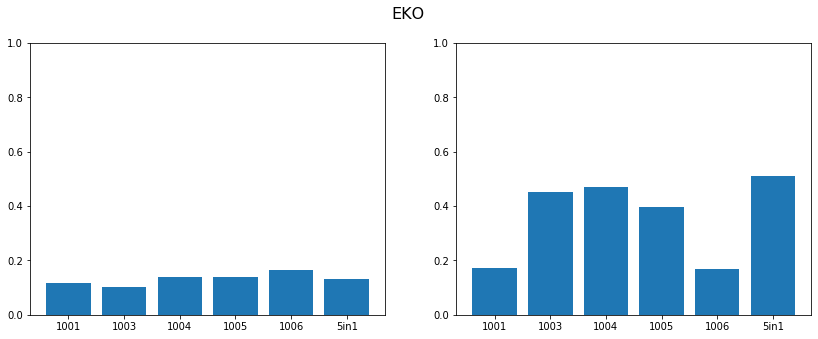

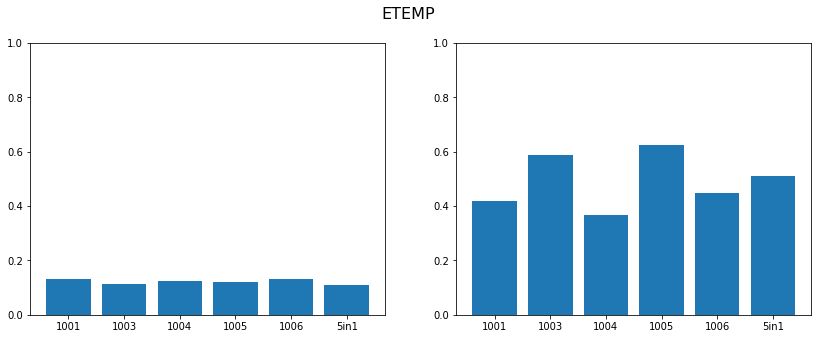

In [55]:
labelsBars=bathNumber[:]
labelsBars.append('5in1')

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
ax[0].bar([0,1,2,3,4,5],rmseSVRMeanEKO, tick_label=labelsBars)
ax[0].set_ylim(0,1)
ax[1].bar([0,1,2,3,4,5],r2scoreSVRMeanEKO, tick_label=labelsBars)
ax[1].set_ylim(np.min([0, np.min([r2scoreSVRMeanEKO])]),1)
fig.suptitle('EKO', fontsize=16)
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
ax[0].bar([0,1,2,3,4,5],rmseSVRMeanETEMP, tick_label=labelsBars)
ax[0].set_ylim(0,1)
ax[1].bar([0,1,2,3,4,5],r2scoreSVRMeanETEMP, tick_label=labelsBars)
ax[1].set_ylim(np.min([0, np.min([r2scoreSVRMeanETEMP])]) ,1)
fig.suptitle('ETEMP', fontsize=16)
plt.show()